In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 데이터 주소
DATA_PATH = "./taxi_fare_data.csv"

In [52]:
#데이터를 DataFram의 형태로 불러옵니다.
def load_csv(path):
    data_frame = pd.read_csv(path)
    return data_frame

# 결측치 처리 함수입니다.
def del_missing(df):

    # df에서 Unnamed: 0 feature 데이터를 제거하고 del_un_df에 저장합니다.
    del_un_df = df.drop(['Unnamed: 0'], axis='columns')

    # del_un_df에서 id feature 데이터를 제거하고 del_un_id_df에 저장합니다.
    del_un_id_df = del_un_df.drop(['id'], axis='columns')

    # del_un_id_df의 누락된 데이터가 있는 행을 제거하고 removed_df에 저장합니다.
    removed_df = del_un_id_df.dropna()

    return removed_df

# 리스트를 입력으로 받아서 해당 리스트 내에 음수값이 있으면 그 위치(인덱스)들을 리스트로 출력하는 함수를 만듭니다.
def get_negative_index(list_data):
    neg_idx = []

    for i, value in enumerate(list_data):
        if value < 0:
            neg_idx.append(list_data.index[i])

    return neg_idx

# DataFrame 내에 제거해야 하는 이상치의 인덱스를 반환하는 함수를 만듭니다.
def outlier_index():
    # get_negative_index() 함수를 통해서, fare_amount와 passenger_count 내의 음수값들의 인덱스를 반환합니다.
    idx_fare_amount = get_negative_index(fare_amount)
    idx_passenger_count = get_negative_index(passenger_count)

    idx_zero_distance = []
    idx = [i for i in range(len(passenger_count))]
    zipped = zip(idx, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)

    for i, x, y, _x, _y in zipped:
        # 타는 곳(pickup_longitude,pickup_latitude)과 내리는 곳(drop_longitude, drop_latitude)이 같은 데이터의 인덱스를 idx_zero_distance에 저장합니다.
        if (x == _x) and (y == _y):
            idx_zero_distance.append(i)

    total_index4remove = list(set(idx_fare_amount+idx_passenger_count+idx_zero_distance))

    return total_index4remove

# 인덱스를 기반으로 DataFrame 내의 데이터를 제거하고, 제거된 DataFrame을 반환하는 함수를 만듭니다.
def remove_outlier(dataframe, list_idx):
    return dataframe.drop(list_idx)

In [53]:
# load_csv 함수를 사용하여 데이터를 불러와 df에 저장합니다.
df = load_csv(DATA_PATH)

# 1-1. del_missing 함수로 df의 결측치을 처리하여 df에 덮어씌웁니다.
df = del_missing(df)

# 불러온 DataFrame의 각 인덱스의 값들을 변수로 저장합니다.
fare_amount = df['fare_amount']
passenger_count = df['passenger_count']
pickup_longitude = df['pickup_longitude']
pickup_latitude = df['pickup_latitude']
dropoff_longitude = df['dropoff_longitude']
dropoff_latitude = df['dropoff_latitude']

print(df.head())
df.info()

    pickup_datetime  pickup_latitude  pickup_longitude  dropoff_latitude  \
0  2015-01-07 15:32             -263              -374             396.0   
1  2015-10-21 22:52              -65               -44              39.0   
2   2017-05-07 3:25              442               424             458.0   
3   2017-05-14 9:57             -349               269            -340.0   
4  2017-04-11 16:01             -119               264            -243.0   

   dropoff_longitude  passenger_count  fare_amount  
0               67.0               -2           31  
1               62.0                2           74  
2              328.0               -2            6  
3              143.0               -2           66  
4              494.0                2           88  
<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    991 no

In [54]:
# 1-2. remove_outlier()을 사용하여 이상치를 제거합니다.
# remove_outlier()가 어떤 인자들을 받는지 확인하세요.
remove_index = outlier_index()
df = remove_outlier(df, remove_index)

print(df.head())
df.info()

     pickup_datetime  pickup_latitude  pickup_longitude  dropoff_latitude  \
1   2015-10-21 22:52              -65               -44              39.0   
4   2017-04-11 16:01             -119               264            -243.0   
5    2015-04-26 3:51              118               454            -159.0   
9   2015-03-04 14:21              213              -194            -102.0   
10   2017-04-24 6:56              202                -1            -437.0   

    dropoff_longitude  passenger_count  fare_amount  
1                62.0                2           74  
4               494.0                2           88  
5              -116.0                2           75  
9               328.0                2           38  
10              260.0                1           37  
<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 1 to 998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_dateti

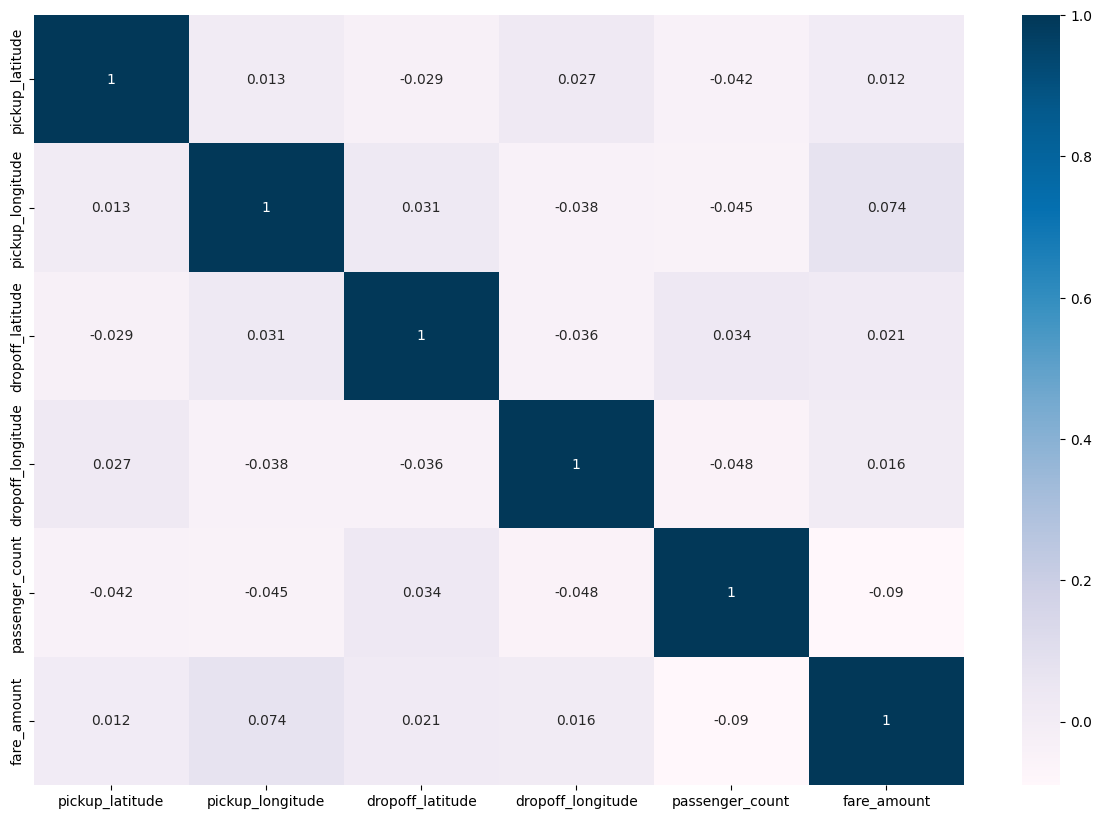

In [55]:
# 2. df.corr()을 사용하여 상관 계수 값 계산
df = df.drop(columns=['pickup_datetime'])  #df['pickup_datetime']제거
corr_df = df.corr()

# seaborn을 사용하여 heatmap 출력
plt.figure(figsize=(15,10))
sns.heatmap(corr_df, annot=True, cmap='PuBu')
plt.savefig("plot.png")